In [85]:
from scipy.signal import windows
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
def detect(xn, fs, window_size=1024, hop_size=512, padding=0, window_type='hann'):
    window = []
    true_size = window_size+padding
    match window_type:
        case 'hann':
            window = windows.hann(true_size)
        case 'hamming':
            window = windows.hamming(true_size)
        case 'blackman':
            window = windows.blackman(true_size)
        case 'bartlett':
            window = windows.bartlett(true_size)
        case 'flattop':
            window = windows.flattop(true_size)
        case 'nuttall':
            window = windows.nuttall(true_size)
        case 'blackmanharris':
            window = windows.blackmanharris(true_size)
        case 'parzen':
            window = windows.parzen(true_size)
        case 'bohman':
            window = windows.bohman(true_size)
        case _:
            raise ValueError(f"Unknown window type: {window_type}")
    
    window_list = []

    frequency_data = []
    time_data = []
    corrs = []

    for window_begin in range(0, len(xn), hop_size):
        window_end = window_begin + window_size
        slice = xn[window_begin:window_end]
        ln = len(slice)
        if len(slice) < true_size:
            slice = np.pad(slice, (0, true_size - len(slice)), 'constant')
        print("start: %i, end: %i, len_before_check: %i,  len_after_check: %i, true_size: %i"%(window_begin, window_end,ln,len(slice),true_size))
        windowed = slice*window
        windowed = np.correlate(windowed, windowed, mode="same");
        xm = np.fft.rfft(windowed)
        
        corrs.append(xm)
        # algorithm here
        m_max = np.argmax(np.abs(xm))
        
        frequency_data.append(m_max*fs/true_size)
        time_data.append(window_end/fs)
    return frequency_data, time_data, corrs

# Frequency Step

start: 0, end: 1024, len_before_check: 1024,  len_after_check: 1024, true_size: 1024
start: 512, end: 1536, len_before_check: 1024,  len_after_check: 1024, true_size: 1024
start: 1024, end: 2048, len_before_check: 1024,  len_after_check: 1024, true_size: 1024
start: 1536, end: 2560, len_before_check: 1024,  len_after_check: 1024, true_size: 1024
start: 2048, end: 3072, len_before_check: 1024,  len_after_check: 1024, true_size: 1024
start: 2560, end: 3584, len_before_check: 1024,  len_after_check: 1024, true_size: 1024
start: 3072, end: 4096, len_before_check: 1024,  len_after_check: 1024, true_size: 1024
start: 3584, end: 4608, len_before_check: 1024,  len_after_check: 1024, true_size: 1024
start: 4096, end: 5120, len_before_check: 1024,  len_after_check: 1024, true_size: 1024
start: 4608, end: 5632, len_before_check: 1024,  len_after_check: 1024, true_size: 1024
start: 5120, end: 6144, len_before_check: 1024,  len_after_check: 1024, true_size: 1024
start: 5632, end: 6656, len_before_c

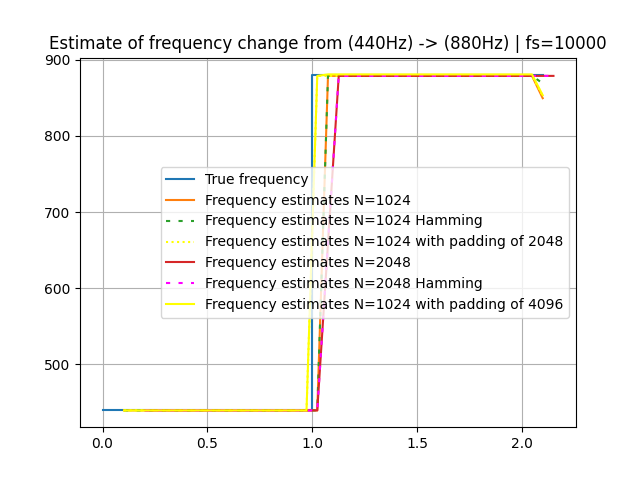

In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

def gen_freq_step(A1, f1, A2, f2, N, fs):
    t_n = np.arange(0, N)/fs
    t_n1 = t_n[:N//2]
    t_n2 = t_n[N//2:]

    time_switch = t_n1[-1]

    sig1 = A*np.sin(2*np.pi*f1*t_n1)
    sig2 = A*np.sin(2*np.pi*f2*t_n2)

    x_n = np.concatenate([sig1, sig2])
    return x_n, time_switch

fs = 10000
N = 2*fs
f1 = 440
f2 = 2*f1
A = 1

x_n, time_switch = gen_freq_step(A,f1,A,f2,N,fs)

f_est, t_est, w = detect(x_n, fs, 1024,512)
f_est2, t_est2, w = detect(x_n, fs, 2048, 1024)

f_est3, t_est3, w = detect(x_n, fs, 1024,512, 0, 'hamming')
f_est4, t_est4, w = detect(x_n, fs, 2048, 1024, 0,'hamming')

f_est5, t_est5, w = detect(x_n, fs, 1024,512, 2048)
f_est6, t_est6, w = detect(x_n, fs, 1024, 512, 4096)



plt.close(2); plt.figure(2)
plt.plot([0,time_switch,time_switch,t_est[-1]], [f1, f1,f2,f2], label="True frequency")

plt.plot(t_est, f_est, label="Frequency estimates N=1024")
line, = plt.plot(t_est3, f_est3, label="Frequency estimates N=1024 Hamming")
line.set_dashes([2,4,2,4])
plt.plot(t_est5, f_est5, label="Frequency estimates N=1024 with padding of 2048", color='yellow', linestyle="dotted")

plt.plot(t_est2, f_est2, label="Frequency estimates N=2048")
line, = plt.plot(t_est4, f_est4, label="Frequency estimates N=2048 Hamming", color='magenta')
line.set_dashes([2,4,2,4])
plt.plot(t_est6, f_est6, label="Frequency estimates N=1024 with padding of 4096", color='yellow')


plt.grid(True)
plt.title(f"Estimate of frequency change from (440Hz) -> (880Hz) | fs={fs}")
plt.legend()


# Noise Test

start: 0, end: 2048, len_before_check: 2048,  len_after_check: 2048, true_size: 2048
start: 1024, end: 3072, len_before_check: 2048,  len_after_check: 2048, true_size: 2048
start: 2048, end: 4096, len_before_check: 2048,  len_after_check: 2048, true_size: 2048
start: 3072, end: 5120, len_before_check: 2048,  len_after_check: 2048, true_size: 2048
start: 4096, end: 6144, len_before_check: 2048,  len_after_check: 2048, true_size: 2048
start: 5120, end: 7168, len_before_check: 2048,  len_after_check: 2048, true_size: 2048
start: 6144, end: 8192, len_before_check: 2048,  len_after_check: 2048, true_size: 2048
start: 7168, end: 9216, len_before_check: 2048,  len_after_check: 2048, true_size: 2048
start: 8192, end: 10240, len_before_check: 2048,  len_after_check: 2048, true_size: 2048
start: 9216, end: 11264, len_before_check: 2048,  len_after_check: 2048, true_size: 2048
start: 10240, end: 12288, len_before_check: 2048,  len_after_check: 2048, true_size: 2048
start: 11264, end: 13312, len_b

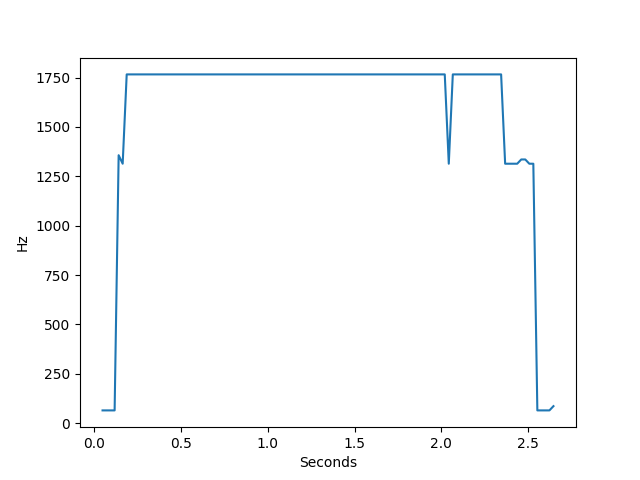

/home/v/School/AIS2201/AIS2201_Project/.venv/lib64/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/v/School/AIS2201/AIS2201_Project/.venv/lib64/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


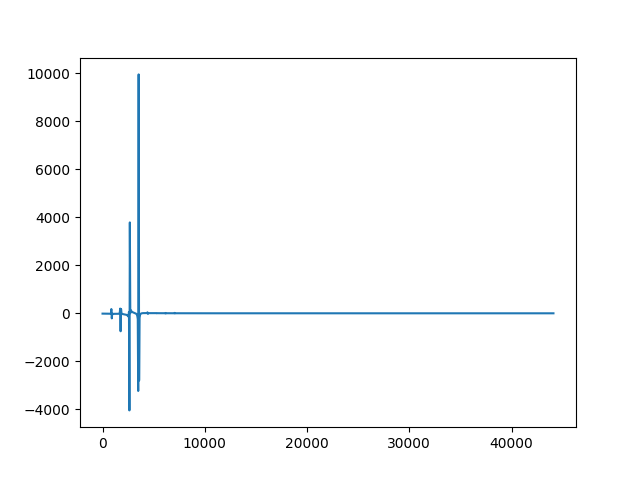

In [86]:
import Frequency_Detection
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.lib.display import Audio

#file_path = "sample_audio/Zauberflöte_vocal.wav"
file_path = "sample_audio/A4_oboe.wav"

fs, data = wavfile.read(file_path)
xn = data / 0x8000

frame_size = 2048
hop_size = 1024

freqs, time, corrs = detect(xn,fs,frame_size,hop_size,0)
t = np.arange(0, 1024+1)*fs/1024
plt.close(3); plt.figure(3)
plt.plot(time, freqs)

plt.xlabel("Seconds")
plt.ylabel("Hz")
plt.show()
len(freqs)

plt.close(4); plt.figure(4)
plt.plot(t, corrs[35])

Audio(xn, rate=fs)